In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
reviews = pd.read_csv("reviews_filtered.csv")

In [3]:
reviews.head()

,business_id,cool,date,funny,review_id,stars,text,useful,user_id
0,k2b3niokS_tosjah_rzCPw,5,2017-02-19 06:21:58,2,gi_-cTGatAcR5Ko_AI1Paw,4,I ordered the Heart Shaped pizza and meatball ...,4,uc9ITBuspRFkl-S3Bo90dg
1,r5PLDU-4mSbde5XekTXSCA,0,2015-04-15 04:50:56,0,vvIzf3pr8lTqE_AOsxmgaA,4,We have been trying Eggplant sandwiches all ov...,0,MAmijW4ooUzujkufYYLMeQ
2,565uVvO-hFqbajFNkt0hnw,0,2018-10-04 12:44:59,0,sqN2rt4W10h512EtD8ErCg,1,"OMG, Longhitano's is absolutely disgusting! I'...",0,51munej7rdZuB7KfPofhaA
3,2S6p5ICNswz_EdgcZk76qQ,1,2009-05-20 01:49:32,1,FxOzEjikyAXf7AlNI8FrxA,4,We were looking for Lancasters and ended up he...,2,4rg-rTjYpnEjNOqi-ej4RA
4,XsSgv3vBOyOBXn3Co8EVIg,1,2015-07-28 08:40:01,1,UjrIOY89To4pp3TSOAPOmQ,4,First time in this place. Pretty impressive. I...,1,LnGDsxHFPhoCKT8sFGaViA


In [4]:
reviews.loc[0,'text']

"I ordered the Heart Shaped pizza and meatball sliders on V-day and it really hit the spot. My honey and I both had to work but wanted something easy that maintains the V-day spirit. Why not a heart shaped pizza? They had a special of a large heart shape with an extra topping for about $20 with tax. Pretty good deal!\nIf you don't already know, Metro pizza serves up a pretty yum pie. I am familiar with a few of their locations, and this one did not taint the reputation. \nMy favorite thing from Metro however, is not the pizza. It is their meatball sliders with fries. BOMB! Yummy meatball sheltered in a garlic knot, YAS PLEASE! They are soooo good! The fries is really good too. Only complaint, fries portion shrinks every time we order the sliders. Please don't skimp on the fries!\nMy experience with Metro is solely based on take out. I need to plan a time to dine-in."

In [5]:
reviews.loc[1,'text']

"We have been trying Eggplant sandwiches all over the valley because my day loves eggplant.  Delfaco's sandwich on the Italian Hoagie had way way too much bread more bread than eggplant.  The eggplant by itself was very tasty, but get it without so much bread, you will thank me later.  We will be back to try something else.  I went at 11 am on a Saturday morning and still waited over 30 minutes for a take out order.  It is a very crammed space, a little Italian deli in between a Italian grocery store.  The prices for the Italian pastas and cheese are a bit over priced.  The espresso is nicely priced at $1.40 for a single shot."

In [7]:
reviews['stars'].describe()

count    594781.000000
mean          3.718860
std           1.403121
min           1.000000
25%           3.000000
50%           4.000000
75%           5.000000
max           5.000000
Name: stars, dtype: float64

In [9]:
star_counts = reviews['stars'].value_counts()

In [12]:
star_counts

5    243027
4    148077
1     75789
3     72899
2     54989
Name: stars, dtype: int64

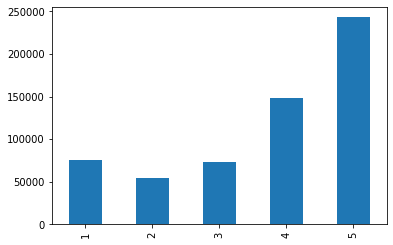

In [11]:
star_counts.sort_index().plot(kind='bar')

In [15]:
good_review_text = reviews.loc[reviews['stars']==5 , 'text']
bad_review_text = reviews.loc[reviews['stars']<4,'text']

In [16]:
good_review_text.shape

(243027,)

In [17]:
bad_review_text.shape

(203677,)

In [18]:
good_review_text = good_review_text.iloc[:1000].str.lower()
bad_review_text = bad_review_text.iloc[:1000].str.lower()

In [19]:
good_review_text.head()

5     ok - we were so sad and bummed when momma mias...
7     before we went to see "love" at the mirage, my...
8     i have been on a quest, since moving to arizon...
9     so good. funghi appetizer, ravioli main (pasta...
10    jason recommended the penne shrimp dish its wa...
Name: text, dtype: object

In [20]:
bad_review_text.head()

2     omg, longhitano's is absolutely disgusting! i'...
12    je suis allã© ã  quelques reprises aux 3 resto...
18    although i have been going to defalco's for ye...
19    the most bland tasting italian food that i hav...
20    i was a little disappointed in the speed of se...
Name: text, dtype: object

In [24]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

In [25]:
good_text = ' '.join(review for review in good_review_text)
bad_text = ' '.join(review for review in bad_review_text)

In [26]:
good_wordcloud = WordCloud(max_words=50).generate(good_text)

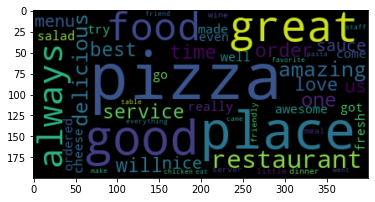

In [27]:
plt.imshow(good_wordcloud, interpolation='bilinear')

In [28]:
good_wordcloud.to_file('./top_review_words.png')

In [29]:
bad_wordcloud = WordCloud(max_words=50).generate(bad_text)

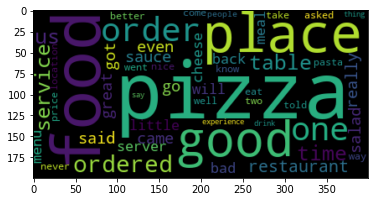

In [30]:
plt.imshow(bad_wordcloud, interpolation='bilinear')

In [31]:
bad_stopwords = set(['pizza', 'food', 'order', 'place'])

In [32]:
stopwords = set(STOPWORDS)
stopwords.update(bad_stopwords)

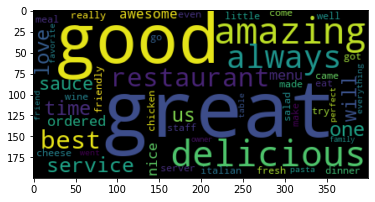

In [33]:
better_wordcloud = WordCloud(stopwords=stopwords, max_words=50).generate(good_text)
plt.imshow(better_wordcloud, interpolation='bilinear')